<a href="https://colab.research.google.com/github/CruzElizorios/aprendiendo-python/blob/main/Resoluci%C3%B3n_ProyectoFinalProgI_2024_preEntregable_Leandro_I%C3%B1aki_Julian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo Práctico: Análisis de Datos de la línea 144**
## Introducción
La linea 144 brinda atención, contención y asesoramiento a personas en situación de violencia de género. Esta línea fue creada en 2013 para cumplir con la ley Nº 26.485 (más información en: https://www.argentina.gob.ar/capital-humano/generos/linea-144).

Se dispone de archivos de datos sobre las llamadas recibidas por este número. Cada registro representa una llamada e incluye información como la fecha, la provincia, el género de la persona que llama, su edad, su nacionalidad, entre otros datos. Los mismos pueden consultarse y descargarse en el sitio https://www.datos.gob.ar/dataset/generos-base-datos-linea-144. En el mismo sitio pueden consultarse los campos con sus tipos de datos y descripción.

En este Proyecto Final se trabajaran con los datos correspondientes a los años 2020 al 2022 (no incluiremos los datos del año 2023 por no estar completos).




## Objetivo del Proyecto final
El objetivo primordial de este Proyecto Final es que el alumno demuestre un empleo adecuado de los elementos y construcciones del lenguaje de programación. Para ello se trabajará con los datos disponibles resolviendo ciertas consignas que se le presentaran en 3 etapas.

A lo largo de tres semanas, trabajarán en la lectura, manipulación y análisis de estos datos, así como en la creación de clases y métodos para comparar y visualizar los resultados.



## Consignas Semana 1:##






1. Descargar los archivos  `datosVG2020.csv`, `datosVG2021.csv` y `datosVG2022.csv` ejectundo el código que se le propone a continuación

In [ ]:
#No modificar este código que le permitirá bajar los archivos que necesita para trabajar

import requests
datosVG2020 = "https://datos-abiertos.mingeneros.gob.ar/datos/linea144-2020.csv"
datosVG2021 = "https://datos-abiertos.mingeneros.gob.ar/datos/linea144-2021.csv"
datosVG2022 = "https://datos-abiertos.mingeneros.gob.ar/datos/linea144-enero-diciembre-2022.csv"

def descargarCSV(url, archivo_salida):
    print("Descargando archivo...")
    consulta = requests.get(url)
    contenido = consulta.content

    print("Guardando archivo...")
    # Abrir conexion en modo escritura
    with open(archivo_salida, "w", encoding="utf-8-sig") as archivo:
        # Escribir el contenido de la consulta
        archivo.write(contenido.decode("utf-8-sig"))

    print("¡Archivo descargado con éxito!")

descargarCSV(datosVG2020, "datosVG2020.csv")
descargarCSV(datosVG2021, "datosVG2021.csv")
descargarCSV(datosVG2022, "datosVG2022.csv")


Descargando archivo...
Guardando archivo...
¡Archivo descargado con éxito!
Descargando archivo...
Guardando archivo...
¡Archivo descargado con éxito!
Descargando archivo...
Guardando archivo...
¡Archivo descargado con éxito!


2. Escribir una función `fusionarArchivosCSV` que tomando una lista de nombres de archivos (con el formato publicado de la linea 144), genere un nuevo archivo con el mismo formato con los datos de los archivos anteriores exceptuando aquellos registros con `fecha` y/o `prov_residencia_persona_en_situacion_violencia` nulos.


3. Invocar a la función `fusionarArchivosCSV` con un lista con los nombres `datosVG2020.csv`, `datosVG2021.csv` y `datosVG2022.csv` y generar un nuevo archivo llamado `datos_filtrados.csv`

In [ ]:
import csv
import matplotlib.pyplot as plt
#ENTREGABLE
#Funciona bien
def fusionarArchivosCSV(lista_archivos_entrada: list[str],archivo_salida: str) -> None:
  """
  fusionarArchivosCSV recibe una lista con los nombres de los archivos a fusionar archivo (con el formato
  publicado de la linea 144) y genera un nuevo archivo en memoria con todos los contenidos de los archivos
  recien mencionados. No devuelve nada.
  """
  # pregunta: lo escribo directo o lo puedo guardar en una lista y despues escribirlo
  listaCompleta = []
  encabezado = ""
  #Lee los datos en cada archivo, agrega los datos que tienen una fecha en listaCompleta
  for archivo in lista_archivos_entrada:
    with open(archivo, mode='r') as dataset:
      contenido = csv.reader(dataset)

      encabezado = next(contenido)
      for linea in contenido:
        #verificacion de que no esten vacias las fechas y las provincias
        fecha = linea[0]
        provincia = linea[1]
        if(fecha != '' and provincia != ''):
          #---modificación para que estandarizar los nombres de las provincias
          linea[1] = provincia.title()
          #---modificación para que solo exita una Córdoba---
          if(provincia == "Cordoba"):
            linea[1] = "Córdoba"
          listaCompleta.append(linea)

  #crea un nuevo archivo csv con los datos que estan en listaCompleta
  with open(archivo_salida, mode='w') as datosCSV:
    contenidoTotal = csv.writer(datosCSV)
    #agrega los titulos en el archivo, en la primera linea
    contenidoTotal.writerow(encabezado)
    #escribe cada lista de la listaCompleta en el archivo nuevo
    for linea in listaCompleta:
      contenidoTotal.writerow(linea)
    return print(f"El archivo {archivo_salida} ha sido creado")

#help(fusionarArchivosCSV)

#invocar la función
fusionarArchivosCSV(["datosVG2020.csv","datosVG2021.csv","datosVG2022.csv"],"datos_filtrados.csv")

El archivo datos_filtrados.csv ha sido creado


In [ ]:
import csv
import matplotlib.pyplot as plt
#funcion de archivos en uno paso
#Funciona bien? SI
def fusionarArchivosCSV(lista_archivos_entrada: list[str],archivo_salida: str) -> None:
  """
  fusionarArchivosCSV recibe una lista con los nombres de los archivos a fusionar archivo (con el formato
  publicado de la linea 144) y genera un nuevo archivo en memoria con todos los contenidos de los archivos
  recien mencionados. No devuelve nada.
  """

  encabezado = ""
  #crea un nuevo archivo csv
  with open(archivo_salida, mode='w') as datosCSV:
    contenidoTotal = csv.writer(datosCSV)
    contador = 0
    #Lee los datos en cada archivo y filtra los mismo para agregarlos al nuevo csv
    for archivo in lista_archivos_entrada:
      with open(archivo, mode='r') as dataset:
        contenido = csv.reader(dataset)
        encabezado = next(contenido)

        if(encabezado != "" and contador == 0):
          contador +=1
          #agrega los titulos en el archivo, en la primera linea
          contenidoTotal.writerow(encabezado)

        for linea in contenido:
          #verificacion de que no esten vacias las fechas y las provincias
          fecha = linea[0]
          provincia = linea[1]
          if(fecha != '' and provincia != ''):
            #---modificación para que estandarizar los nombres de las provincias
            linea[1] = provincia.title()
            #---modificación para que solo exita una Córdoba---
            if(provincia == "Cordoba"):
              linea[1] = "Córdoba"
            #escribe cada linea que cumpla las condiciones en el nuevo archuvo
            contenidoTotal.writerow(linea)
  return print(f"El archivo {archivo_salida} ha sido creado")

#help(fusionarArchivosCSV)

#invocar la función
fusionarArchivosCSV(["datosVG2020.csv","datosVG2021.csv","datosVG2022.csv"],"pruebaFuncion22.csv")

El archivo pruebaFuncion22.csv ha sido creado


In [ ]:
import csv
# NO ES ENTREGABLE
#Primer intento, funciona pero es mejorable porque se lee muchas veces para buscar los encabezados

def fusionarArchivosCSV(lista_archivos_entrada: list[str],archivo_salida: str) -> None:
  """
  fusionarArchivosCSV recibe una lista con los nombres de los archivos a fusionar archivo (con el formato
  publicado de la linea 144) y genera un nuevo archivo en memoria con todos los contenidos de los archivos
  recien mencionados. No devuelve nada.
  """
  #completar
  listaCompleta = []
  #Lee los datos en cada archivo, agrega los datos que tienen una fecha en listaCompleta
  for archivo in lista_archivos_entrada:
    with open(archivo, mode='r') as dataset:
      contenido = csv.reader(dataset)

      encabezado = next(contenido)

      for linea in contenido:
        #verificacion de que no esten vacias las fechas y las provincias
        if(linea[0] != '' and linea[1] != ''):
          listaCompleta.append(linea)

  #crea un nuevo archivo csv con los datos que estan en listaCompleta
  with open(archivo_salida, mode='w') as datosCSV:
    contenidoTotal = csv.writer(datosCSV)
    encabezado = ""

    for linea in listaCompleta:
      #---cambiar la forma en que se quita el encabezado usando next()---
      #el encabezado se repite en cada archivo osea 3 veces, de esta manera los quito
      if(linea[1] == "prov_residencia_persona_en_situacion_violencia"):
          #print(linea)
          encabezado = linea
          listaCompleta.remove(linea)
    #agrega los titulos en el archivo, en la primera linea
    contenidoTotal.writerow(encabezado)
    #escribe cada lista de la listaCompleta en el archivo nuevo
    for linea in listaCompleta:
      contenidoTotal.writerow(linea)
    return print(f"El archivo {archivo_salida} ha sido creado")

#help(fusionarArchivosCSV)

#invocar la función
fusionarArchivosCSV(["datosVG2020.csv","datosVG2021.csv","datosVG2022.csv"],"datos_filtrados.csv")

4. Escribir una función *obtenerAnios* que reciba el nombre de un archivo (con el formato publicado de la linea 144) y devuelva la lista de años que aparecen en el archivo.


In [ ]:
def obtenerAnios(nombre_archivo: str) -> list[int]:
  """
  obtenerAnios es una funcion que recibe recibe el nombre de un archivo (con el formato
  publicado de la linea 144) y devuelve la lista de años que aparecen en el archivo
  """
  listaAnios = []
  with open(nombre_archivo, mode = 'r') as dataset:
    contenidoDelArchivo = csv.reader(dataset)
    #next salta la primera linea del archivo
    next(contenidoDelArchivo)
    for linea in contenidoDelArchivo:
      listaAnioMesDia = linea[0].split("-") # ["2020","12","30"]
      # in verifica que el año este adentro de listaAnios
      if(not(listaAnioMesDia[0] in listaAnios)):
        listaAnios.append(listaAnioMesDia[0])
  return listaAnios

#help(obtenerAnios)
obtenerAnios("datos_filtrados.csv")

['2020', '2021', '2022']

5. Escribir una función *crearEstadisticasAnualDesdeArchivo* que reciba el nombre de un archivo (con el formato publicado de la linea 144) y devuelva:
- un diccionario donde las claves sean las provincias argentinas desde donde se realizaron llamadas ese año a la linea 144 y los valores son la cantidad de llamadas que recibió cada provincia en dicho año, y
- el promedio de edades de las personas que llamaron a esa línea durante todo el año (como valor entero)




In [ ]:
# primer intento bien pero mejorable
def crearEstadisticasAnualDesdeArchivo(nombre_archivo: str, anio:int) -> tuple[dict[str,int],int] | None:
  """
  crearEstadisticasAnualDesdeArchivo recibe el nombre de un archivo (con el formato publicado de la linea 144)
  y un año y devuelve:
    - None si no hay datos de dicho año en el archivo
    - un diccionario contar_provincias: dict[str,int]
        donde las claves son las provincias argentinas desde donde se realizaron llamadas ese año
        a la linea 144 y los valores son la cantidad de llamadas que recibió cada provincia en dicho año,
      y promedio_edades: int que es el promedio de edades de las personas que llamaron a esa línea durante todo el año
  """

  if (str(anio) in obtenerAnios(nombre_archivo)):
    dicllamadoPorProvincia = {}
    sumaEdad = 0
    cantLlamada = 0
    with open(nombre_archivo, mode = 'r') as dataset:
      contenidoDelArchivo = csv.reader(dataset)
      next(contenidoDelArchivo)

      for linea in contenidoDelArchivo: # [2022-06-28,santa fe,30]
        listaAnioMesDia = linea[0].split("-") #["2022","06","28"]
        if( int(listaAnioMesDia[0]) == anio):
          #si la edad no esta vacia
          edad = linea[3]
          provincia = linea[1]
          #para el promedio no se cuentan las edades que esten vacias
          if( edad != ''):
            sumaEdad += int(edad)
            cantLlamada += 1
          # PREGUNTA: si la edad esta vacia, ¿lo cuento como un llamado valido y lo sumo al diccionario? o lo omito
          if(provincia in dicllamadoPorProvincia):
            dicllamadoPorProvincia[provincia] += 1
          else:
            dicllamadoPorProvincia[provincia] = 1
        # NO era necesario la parte del continue
        # si no esta el año
        # else:
        #   continue
      promedio = round(sumaEdad / cantLlamada, 3)
    return (dicllamadoPorProvincia, promedio)
  else:
    return print("no esta año")

 # help(crearEstadisticasAnualDesdeArchivo)
crearEstadisticasAnualDesdeArchivo("datos_filtrados.csv", 2018)

no esta año


In [ ]:
# ENTREGABLE
#codigo final, funciona bien
def crearEstadisticasAnualDesdeArchivo(nombre_archivo: str, anio:int) -> tuple[dict[str,int],int] | None:
  """
  crearEstadisticasAnualDesdeArchivo recibe el nombre de un archivo (con el formato publicado de la linea 144)
  y un año y devuelve:
    - None si no hay datos de dicho año en el archivo
    - un diccionario contar_provincias: dict[str,int]
        donde las claves son las provincias argentinas desde donde se realizaron llamadas ese año
        a la linea 144 y los valores son la cantidad de llamadas que recibió cada provincia en dicho año,
      y promedio_edades: int que es el promedio de edades de las personas que llamaron a esa línea durante todo el año
  """
  #verifico que el año que entre por argumento no este dentro del archivo
  if (str(anio) not in obtenerAnios(nombre_archivo)):
    return None

  dicllamadoPorProvincia = {}
  sumaEdad = 0
  cantLlamada = 0

  with open(nombre_archivo, mode = 'r') as dataset:
    contenidoDelArchivo = csv.reader(dataset)
    next(contenidoDelArchivo)

    for linea in contenidoDelArchivo: # [2022,santa fe,mujer,30]
      fecha = linea[0]
      provincia = linea[1]
      edad = linea[3]

      listaAnioMesDia = fecha.split("-") #["2022","06","28"]
      anioDelArchivo = int(listaAnioMesDia[0])
      # si no esta el año
      if( not(anioDelArchivo == anio)):
        continue
      #si la edad no esta vacia
      if(edad != ''):
        sumaEdad += int(edad)
        cantLlamada += 1
      # PREGUNTA: si la edad esta vacia, ¿lo cuento como un llamdo valido y lo sumo al diccionario? o lo omito
      if(provincia in dicllamadoPorProvincia):
        dicllamadoPorProvincia[provincia] += 1
      else:
        dicllamadoPorProvincia[provincia] = 1

    promedio = round(sumaEdad / cantLlamada, 2)
    #promedio = int(sumaEdad / cantLlamada)
  return (dicllamadoPorProvincia, promedio)

 # help(crearEstadisticasAnualDesdeArchivo)
crearEstadisticasAnualDesdeArchivo("datos_filtrados.csv", 2021)

({'Buenos Aires': 13695,
  'Ciudad Autónoma De Buenos Aires': 5272,
  'La Rioja': 103,
  'Santa Fe': 981,
  'Córdoba': 700,
  'Tucumán': 955,
  'Mendoza': 844,
  'San Luis': 153,
  'Chubut': 75,
  'Chaco': 190,
  'Neuquén': 175,
  'Santiago Del Estero': 135,
  'Entre Ríos': 135,
  'Jujuy': 342,
  'Salta': 326,
  'Misiones': 123,
  'Río Negro': 123,
  'San Juan': 179,
  'Formosa': 88,
  'La Pampa': 21,
  'Corrientes': 135,
  'Catamarca': 73,
  'Santa Cruz': 39,
  'Tierra Del Fuego, Antártida E Islas Del Atlántico Sur': 25},
 35.67)

# Semana 2 07/06/24

---





**6**. Definir una clase `EstadisticasAnual`

  con los siguientes atributos:
- `anio`: año asociado a la clase,
- `cant_llamadas_por_provincia`: diccionario donde las claves son las provincias argentinas desde donde se realizaron llamadas el año `anio` a la linea 144 y los valores son la cantidad de llamadas que recibió cada provincia en dicho año
- `promedio_edades`: que es el promedio de edades de las personas que llamaron a esa linea durante el año `anio` (como valor entero)

  y los siguientes métodos:
- `__init__`
- `get_anio`
- `get_cant_llamadas_por_provincia`
- `get_promedio_edad_llamantes`
- `__str__`

    Para el año 2020:
    El promedio de edad de las denunciantes es: 36.08
    Las llamadas por provincia son: {'Tucumán': 948, 'Buenos Aires': 16809, 'Santiago Del Estero': 195, 'Santa Fe': 1257, 'San Juan': 212, 'Catamarca': 73, 'Neuquén': 182, 'Mendoza': 1180, 'Córdoba': 826, 'Río Negro': 164, 'Ciudad Autónoma De Buenos Aires': 5267, 'Salta': 473, 'Entre Ríos': 209, 'Jujuy': 443, 'Chaco': 238, 'Chubut': 96, 'San Luis': 152, 'La Pampa': 25, 'Misiones': 143, 'Formosa': 117, 'Tierra Del Fuego, Antártida E Islas Del Atlántico Sur': 28, 'Corrientes': 136, 'Santa Cruz': 40, 'La Rioja': 65}


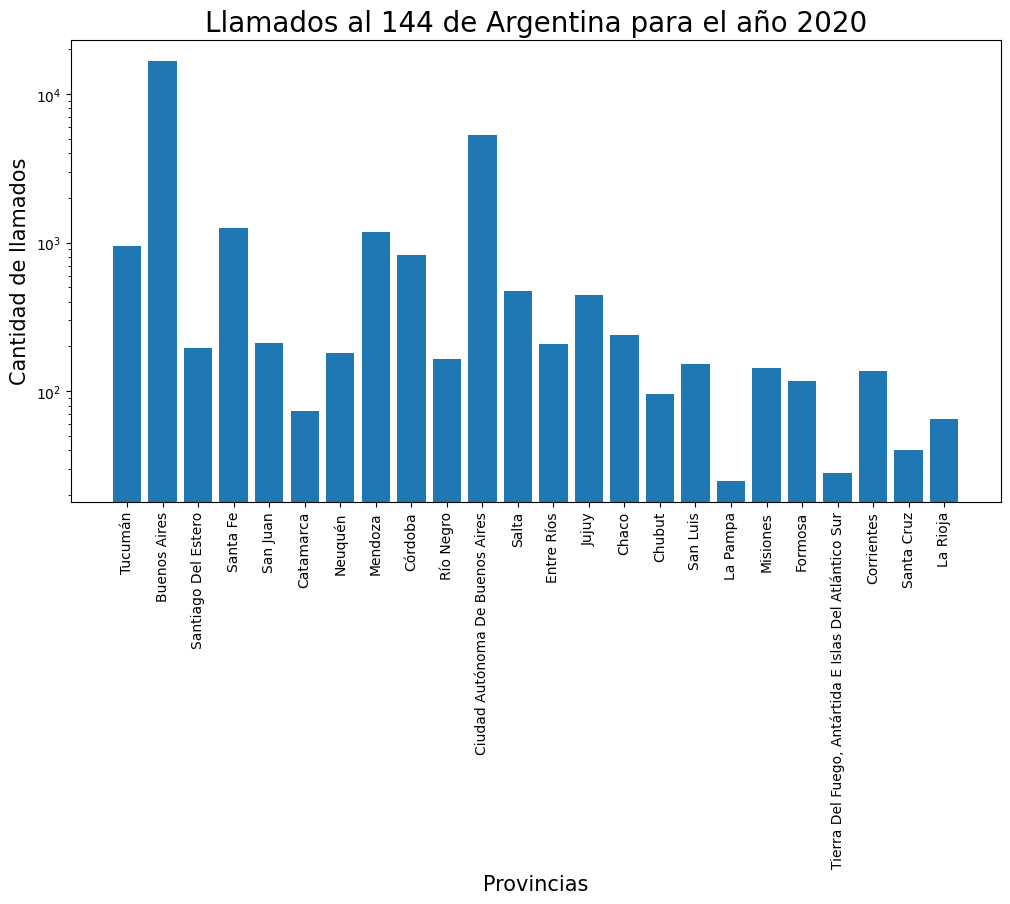

In [ ]:
"""
La clase EstadisticasAnual se utilizará para mantener información sobre
estadísticas de Situaciones de Violencia en Argentina en un año en particular
"""

class EstadisticasAnual:
  def __init__(self, anio: int, cant_llamadas_por_provincia:dict[str,int], promedio_edad_llamantes: int):
    self.ano = anio
    self.cant_llamadas_por_provincia = cant_llamadas_por_provincia
    self.promedio_edad_llamantes = promedio_edad_llamantes

  def getAnio(self) -> int:
    return self.ano

  def getCantLlamadasPorProvincia(self) -> dict[str,int]:
    return self.cant_llamadas_por_provincia

  def getPromedioEdadLlamantes(self) -> int:
    return self.promedio_edad_llamantes
  #si no tiene este metodo magico, cuando lo quiero imprimir muestra la posicion en memoria:
  # <__main__.EstadisticasAnual object at 0x78d5782b2830>
  def __str__(self)->str:
    return f"""    Para el año {self.ano}:
    El promedio de edad de las denunciantes es: {self.promedio_edad_llamantes}
    Las llamadas por provincia son: {self.cant_llamadas_por_provincia}"""
  def graficarLLamadasPorProvincia(self) -> None:
    plt.figure(figsize = (12,6))
    plt.xticks(rotation = 90, fontsize=10)
    plt.yticks(fontsize=10)
    plt.yscale('log')
    #plt.ylim([0,8000])
    plt.xlabel('Provincias',fontsize=15)
    plt.ylabel('Cantidad de llamados',fontsize=15)
    plt.title(f'Llamados al 144 de Argentina para el año {self.ano}',fontsize=20)
    plt.bar( self.cant_llamadas_por_provincia.keys(), self.cant_llamadas_por_provincia.values())


datos2020 = EstadisticasAnual(2020,crearEstadisticasAnualDesdeArchivo("datos_filtrados.csv", 2020)[0],crearEstadisticasAnualDesdeArchivo("datos_filtrados.csv", 2020)[1])
print(datos2020)
datos2020.graficarLLamadasPorProvincia()

7. Escribir una función crearObjetosEstadisticasAnual que tome el nombre de un archivo y devuelva una lista de objetos de la clase EstadisticasAnual, donde cada objeto contiene información de cada año del cual se disponen datos en el archivo. Debe invocar a las funciones `obtenerAnios` y `crearEstadisticasAnualDesdeArchivo`

8. Invocar a la función anterior con el nombre de archivo  `datos_filtrados.csv`.

In [ ]:
def crearObjetosEstadisticasAnual(nombreArchivo: str) -> list[object]:
  listaObjetos = []
  listaAnios = obtenerAnios(nombreArchivo) #devuelve -> ['2020', '2021', '2022']

  for anio in listaAnios:
    ano = int(anio)
    dicLlamadosPorProvincia, promedio = crearEstadisticasAnualDesdeArchivo(nombreArchivo,ano) #devuelve -> tupla(dic,promedio)
    # llamo a la clase EstadisticasAnual
    objeto = EstadisticasAnual(ano,dicLlamadosPorProvincia,promedio)
    listaObjetos.append(objeto)
  return listaObjetos

listaEjdeObjetos = crearObjetosEstadisticasAnual("datos_filtrados.csv")
print(listaEjdeObjetos)
#devuelve la lista con los objetos:
# [<__main__.EstadisticasAnual at 0x78d546af6680>,<__main__.EstadisticasAnual at 0x78d546af4280>,<__main__.EstadisticasAnual at 0x78d546af60b0>]
#---para probar que esta devolviendo---
#datos2020 = lista[2]
#datos2020.getCantLlamadasPorProvincia()

[<__main__.EstadisticasAnual object at 0x7ea6e16753c0>, <__main__.EstadisticasAnual object at 0x7ea6e9deaf20>, <__main__.EstadisticasAnual object at 0x7ea70c7a3c70>]


# Semana 3 14/06/24

---





9. Agregar el método `graficarLLamadasPorProvincia` a la clase `EstadisticasAnual` que muestre en un gráfico de barras la cantidad de llamadas que se hicieron en el año en cuestión desde cada provincia.

10. Realizar las gráficas para los años que se disponen de datos invocando a este método a partir de los objetos creados en el punto 8.

In [ ]:
#Para usar esta librería, vamos a incluir estas líneas de código
import matplotlib.pyplot as plt


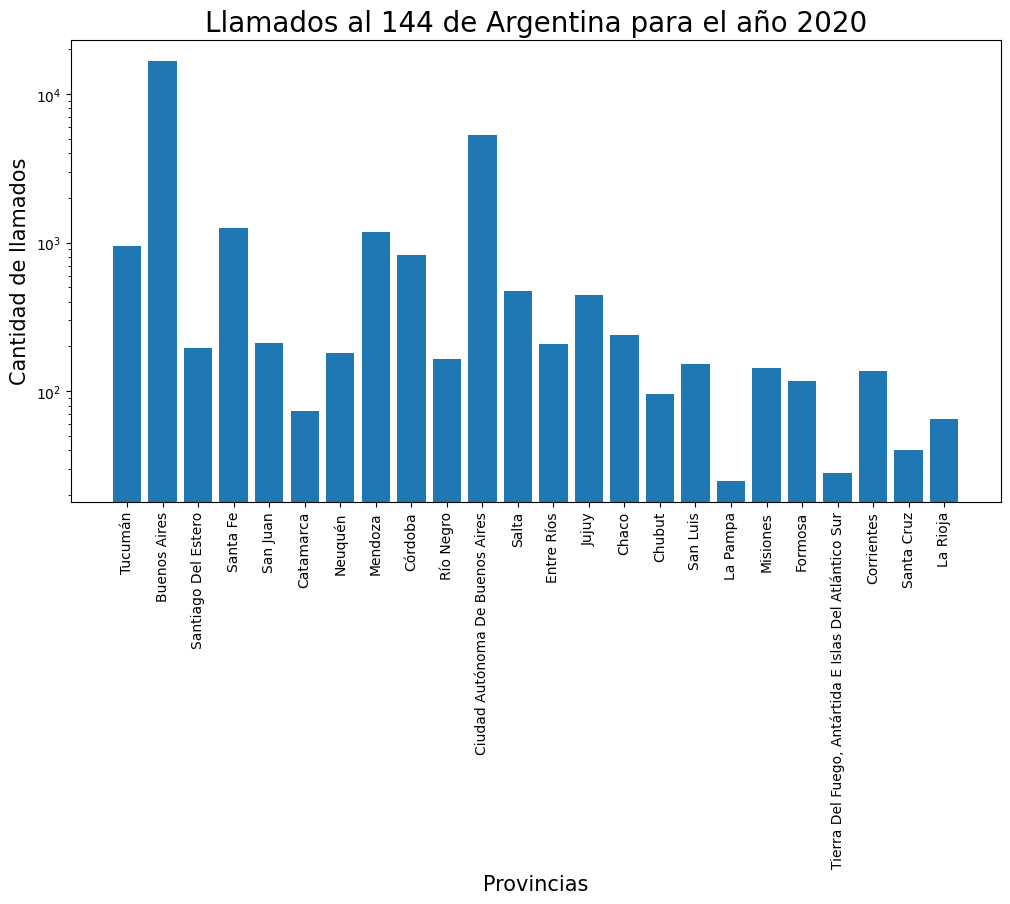

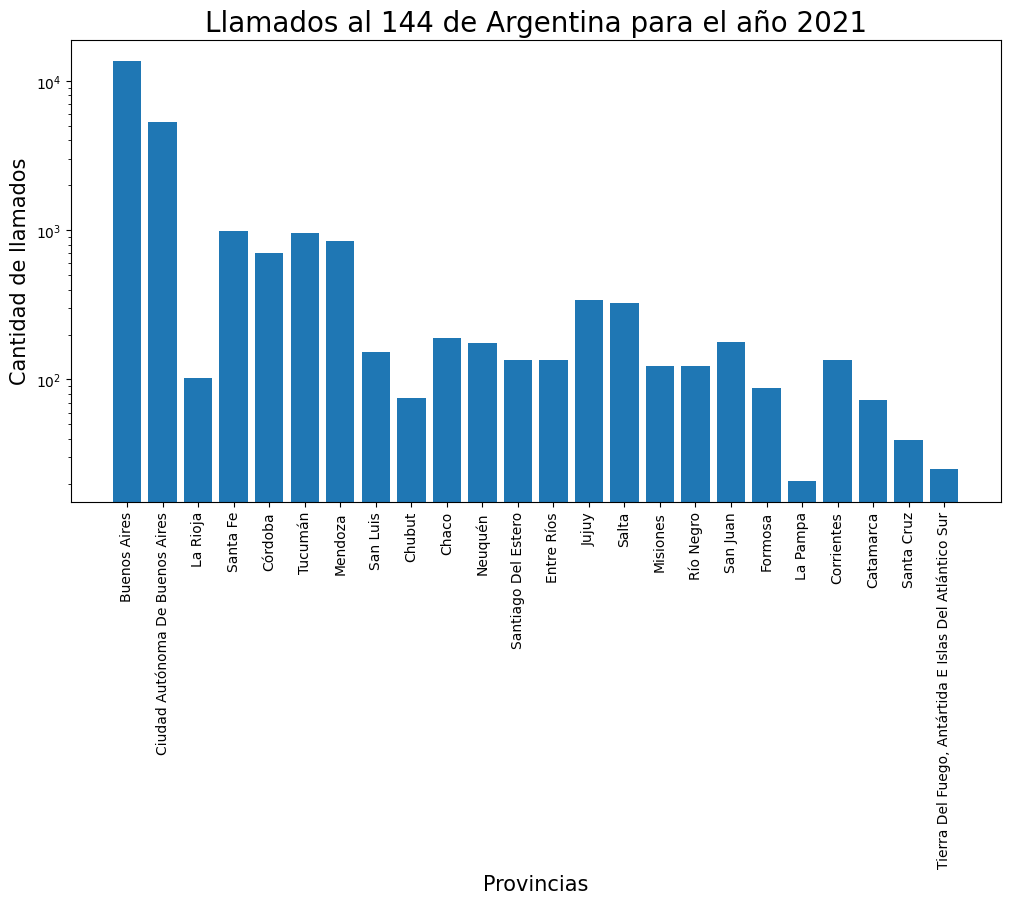

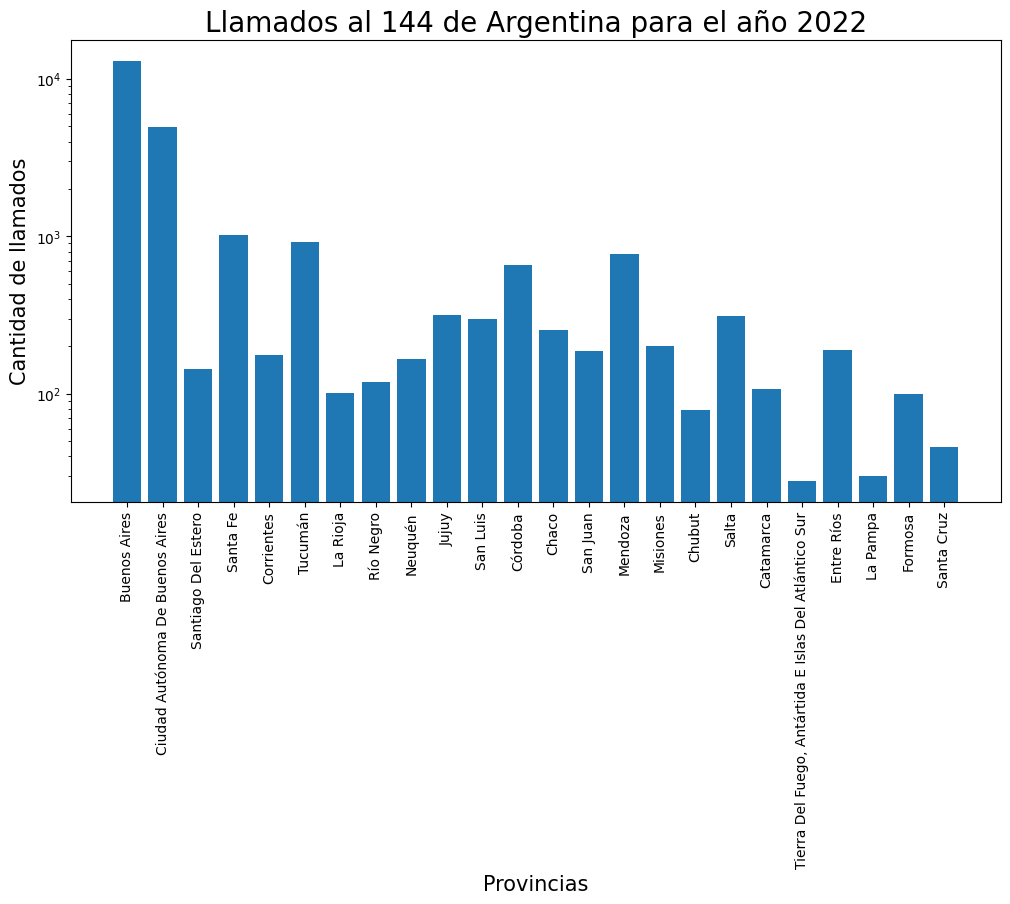

In [ ]:
listaObjetosEstadis = crearObjetosEstadisticasAnual("datos_filtrados.csv")
for objeto in listaObjetosEstadis:
  objeto.graficarLLamadasPorProvincia()

{'Buenos Aires': 13695, 'Ciudad Autónoma De Buenos Aires': 5272, 'La Rioja': 103, 'Santa Fe': 981, 'Córdoba': 700, 'Tucumán': 955, 'Mendoza': 844, 'San Luis': 153, 'Chubut': 75, 'Chaco': 190, 'Neuquén': 175, 'Santiago Del Estero': 135, 'Entre Ríos': 135, 'Jujuy': 342, 'Salta': 326, 'Misiones': 123, 'Río Negro': 123, 'San Juan': 179, 'Formosa': 88, 'La Pampa': 21, 'Corrientes': 135, 'Catamarca': 73, 'Santa Cruz': 39, 'Tierra Del Fuego, Antártida E Islas Del Atlántico Sur': 25}


<BarContainer object of 24 artists>

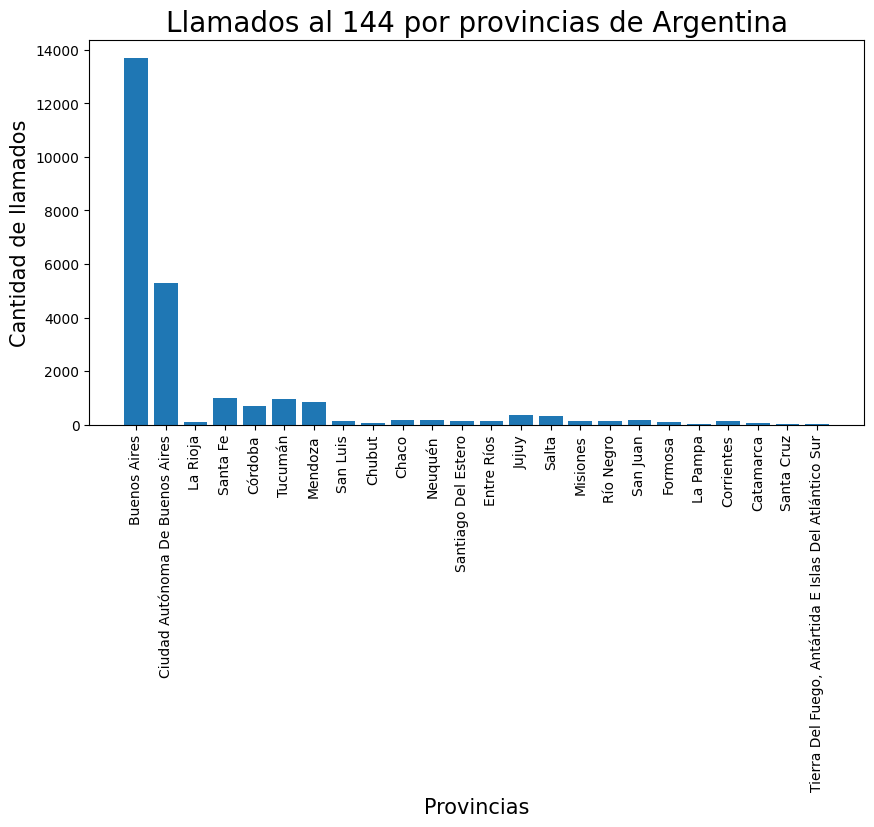

In [ ]:
#PRACTICA

dicPorProvincia, promedioEdadAnio = crearEstadisticasAnualDesdeArchivo("datos_filtrados.csv",2021)
print(dicPorProvincia)
#Para Grafico de BARRAS
#En las siguientes líneas seteamos los valores del gráfico:
plt.figure(figsize = (10,5)) #para dar las dimensiones de la figura (ojo que debe ir arriba)
plt.xticks(rotation = 90, fontsize=10); #rota las etiquetas del eje x y tamaño de la fuente de los valores del eje x
plt.yticks(fontsize=10); #tamaño de la fuente de los valores del eje y
plt.xlabel('Provincias',fontsize=15) #indica qué representa el eje x
plt.ylabel('Cantidad de llamados',fontsize=15) #indica qué representa el eje y
plt.title('Llamados al 144 por provincias de Argentina',fontsize=20) #titulo del gráfico y tamaño de la fuente
#esta última instrucción es la que construye el gráfico tomando en cuenta los valores seteados anteriomente
plt.bar(dicPorProvincia.keys(), dicPorProvincia.values()) #pasamos los datos a graficar, en el eje x las claves del diccionario, en el y los valores del diccionario



11. Definir una nueva clase `EstadisticasViolencia`

  con el atributo:
- `estadisticasAnuales`: lista de objetos de la clase `EstadisticasAnual`
  
  y los siguientes métodos:
- `__init__`
- `compararPromediosEdadesPorAnio`
- `minimaEdadPromedio`
- `compararGráficamenteDosAnios`
- `__str__`

El año con menor edad promedio es: 2022 y el promedio de edad del denunciante es: 35.33


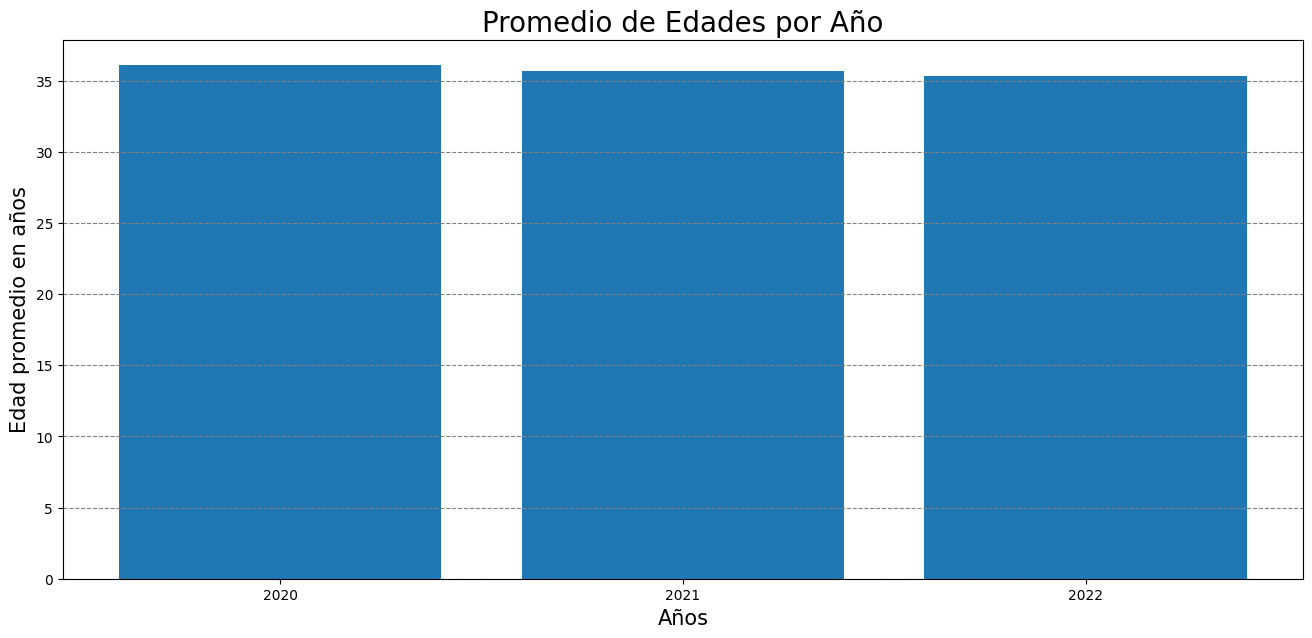

In [ ]:
"""
La clase EstadisticasViolencia se utilizará para mantener información sobre
estadísticas de Situaciones de Violencia en Argentina, para todos los años
que se disponga de datos
"""
class EstadisticasViolencia:
  def __init__(self, estadisticasAnuales: list[EstadisticasAnual:object]):
    self.estadisticasAnuals = estadisticasAnuales

  def compararPromediosEdadesPorAnio(self):
    dicAnioPromEdad = {}
    for objeto in self.estadisticasAnuals:
      promedioEdad = objeto.getPromedioEdadLlamantes()
      nombreClave = str(objeto.getAnio())
      dicAnioPromEdad[nombreClave] = promedioEdad
    #print(dicAnioPromEdad)
    plt.figure(figsize = (16,7))
    plt.xticks(rotation = 0, fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel('Años',fontsize=15)
    plt.ylabel('Edad promedio en años',fontsize=15)
    plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
    plt.title(f'Promedio de Edades por Año',fontsize=20)

    plt.bar(dicAnioPromEdad.keys(), dicAnioPromEdad.values())

  def minimaEdadPromedioyAnio(self):
    minPromEdad = 1000
    anioDelMinPromEdad = 0
    for objeto in self.estadisticasAnuals:
      edad = objeto.getPromedioEdadLlamantes()
      if(minPromEdad > edad):
        minPromEdad = edad
        anioDelMinPromEdad = objeto.getAnio()
    print(f"El año con menor edad promedio es: {anioDelMinPromEdad} y el promedio de edad del denunciante es: {minPromEdad}")

  def compararGraficamenteDosAnios(self,anio1, anio2):
    lista2dic = []
    listaAnio = []
    for objeto in self.estadisticasAnuals:
      anioObjeto = objeto.getAnio()
      if(anioObjeto == anio1 or anioObjeto == anio2):
        dicProvincias = objeto.getCantLlamadasPorProvincia()
        anioEst = objeto.getAnio()
        lista2dic.append(dicProvincias)
        listaAnio.append(anioEst)

    listaValores1 = []
    listaValores2 = []
    for prov in lista2dic[0].keys():
      var = lista2dic[0][prov]
      var2 = lista2dic[1][prov]
      listaValores1.append(var)
      listaValores2.append(var2)
    #para verificar que esten bien creadas las listas
    # print(lista2dic[0])
    # print(lista2dic[1])
    # print(listaValores1)
    # print(listaValores2)

    plt.figure(figsize = (15,7))
    plt.xticks(rotation = 90, fontsize=10)
    plt.xlabel('jurisdicciones',fontsize=15)
    plt.ylabel('cantidad de llamados (esc. log10)',fontsize=15)
    plt.title(f'Comparativo de llamados por Año',fontsize=20)
    plt.yscale('log')
    yticks_values = [25,50,100,250,500,1000,2500,5000,10000,15000]
    plt.yticks(yticks_values, [str(val) for val in yticks_values],fontsize=10)
    plt.plot(lista2dic[0].keys(), listaValores1, label = f'año: {listaAnio[0]}', color = 'tab:purple', marker = 'o')
    plt.plot(lista2dic[0].keys(), listaValores2, label = f'año: {listaAnio[1]}', color = 'tab:orange', marker = 'v')
    plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
    plt.legend(loc = 'upper right')
    plt.show()

  def __str__(self):
    info = "Estadisticas de la linea 144: \n"
    for objeto in self.estadisticasAnuals:
      info = info + objeto.__str__() + "\n"
    return info
EstadisticasViolencia(listaObjetosEstadis).minimaEdadPromedioyAnio()
EstadisticasViolencia(listaObjetosEstadis).compararPromediosEdadesPorAnio()
#EstadisticasViolencia(listaObjetosEstadis).compararGraficamenteDosAnios(2020,2022)
#print(EstadisticasViolencia(listaObjetosEstadis))

In [ ]:
# COMO GRAFICAR
#https://aprendeconalf.es/docencia/python/manual/matplotlib/

# plt.figure(figsize = (10,7))
# plt.xticks(rotation = 90, fontsize=10)
# plt.yticks(fontsize=10)
# plt.xlabel('Años',fontsize=15)
# plt.ylabel('Edad promedio en años',fontsize=15)
# plt.title(f'Promedio de Edades por Año',fontsize=20)
# plt.bar(provincias.keys(), provincias.values(), color = 'tab:purple')
# plt.bar(provincias.keys(), provincias2.values(), color = 'tab:orange')
provincias = {"santa":20,"cordoba":15,"bsas":13}
provincias2 = {"santa":18,"bsas":15, "cordoba":10}

plt.figure(figsize = (10,7))
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Años',fontsize=15)
plt.ylabel('Edad promedio en años',fontsize=15)
plt.title(f'Promedio de Edades por Año',fontsize=20)
plt.plot(provincias.keys(), provincias.values(), color = 'tab:purple', marker = "o", label="provincias")
plt.plot(provincias.keys(), provincias2.values(), color = 'tab:orange', marker="v", label="pronvicias2")
plt.legend()

12. Crear un objeto instanciando la clase `EstadisticasViolencia` que contenga los datos de todos los años disponibles.
13. Invocar a cada uno de los métodos de la clase con el objeto creado en el punto anterior. Compare gráficamente dos años de su elección.

Estadisticas de la linea 144: 
    Para el año 2020:
    El promedio de edad de las denunciantes es: 36
    Las llamadas por provincia son: {'Tucumán': 948, 'Buenos Aires': 16809, 'Santiago Del Estero': 195, 'Santa Fe': 1257, 'San Juan': 212, 'Catamarca': 73, 'Neuquén': 182, 'Mendoza': 1180, 'Córdoba': 826, 'Río Negro': 164, 'Ciudad Autónoma De Buenos Aires': 5267, 'Salta': 473, 'Entre Ríos': 209, 'Jujuy': 443, 'Chaco': 238, 'Chubut': 96, 'San Luis': 152, 'La Pampa': 25, 'Misiones': 143, 'Formosa': 117, 'Tierra Del Fuego, Antártida E Islas Del Atlántico Sur': 28, 'Corrientes': 136, 'Santa Cruz': 40, 'La Rioja': 65}
    Para el año 2021:
    El promedio de edad de las denunciantes es: 35
    Las llamadas por provincia son: {'Buenos Aires': 13695, 'Ciudad Autónoma De Buenos Aires': 5272, 'La Rioja': 103, 'Santa Fe': 981, 'Córdoba': 700, 'Tucumán': 955, 'Mendoza': 844, 'San Luis': 153, 'Chubut': 75, 'Chaco': 190, 'Neuquén': 175, 'Santiago Del Estero': 135, 'Entre Ríos': 135, 'Jujuy': 342,

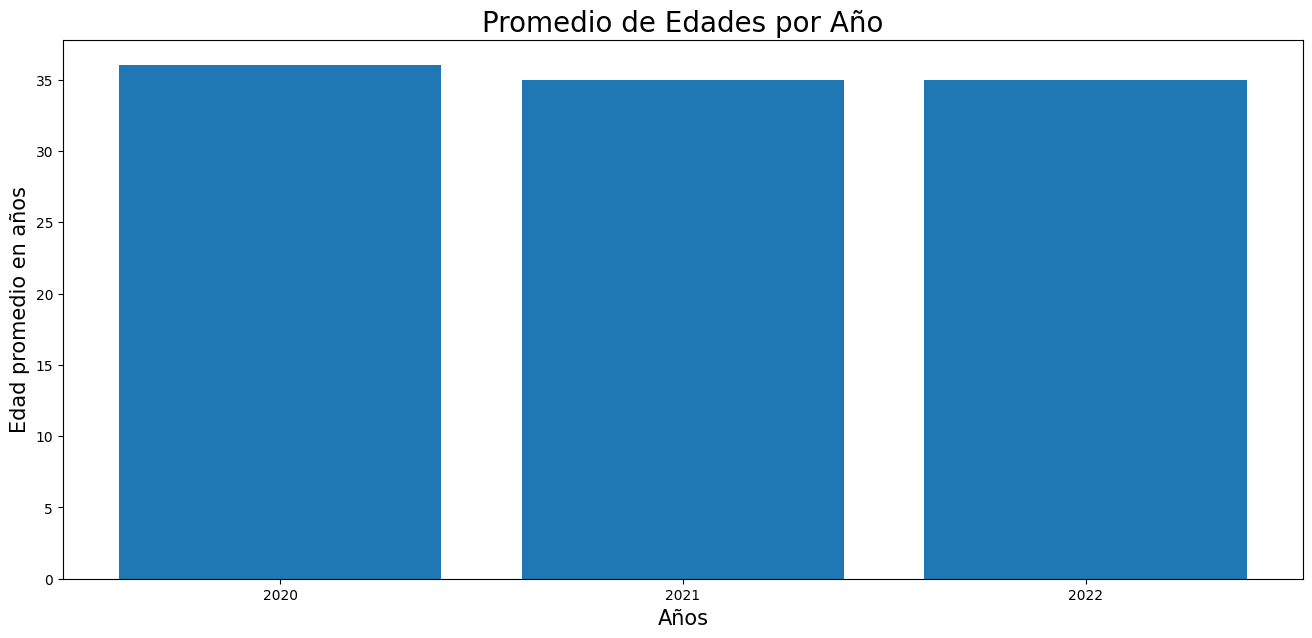

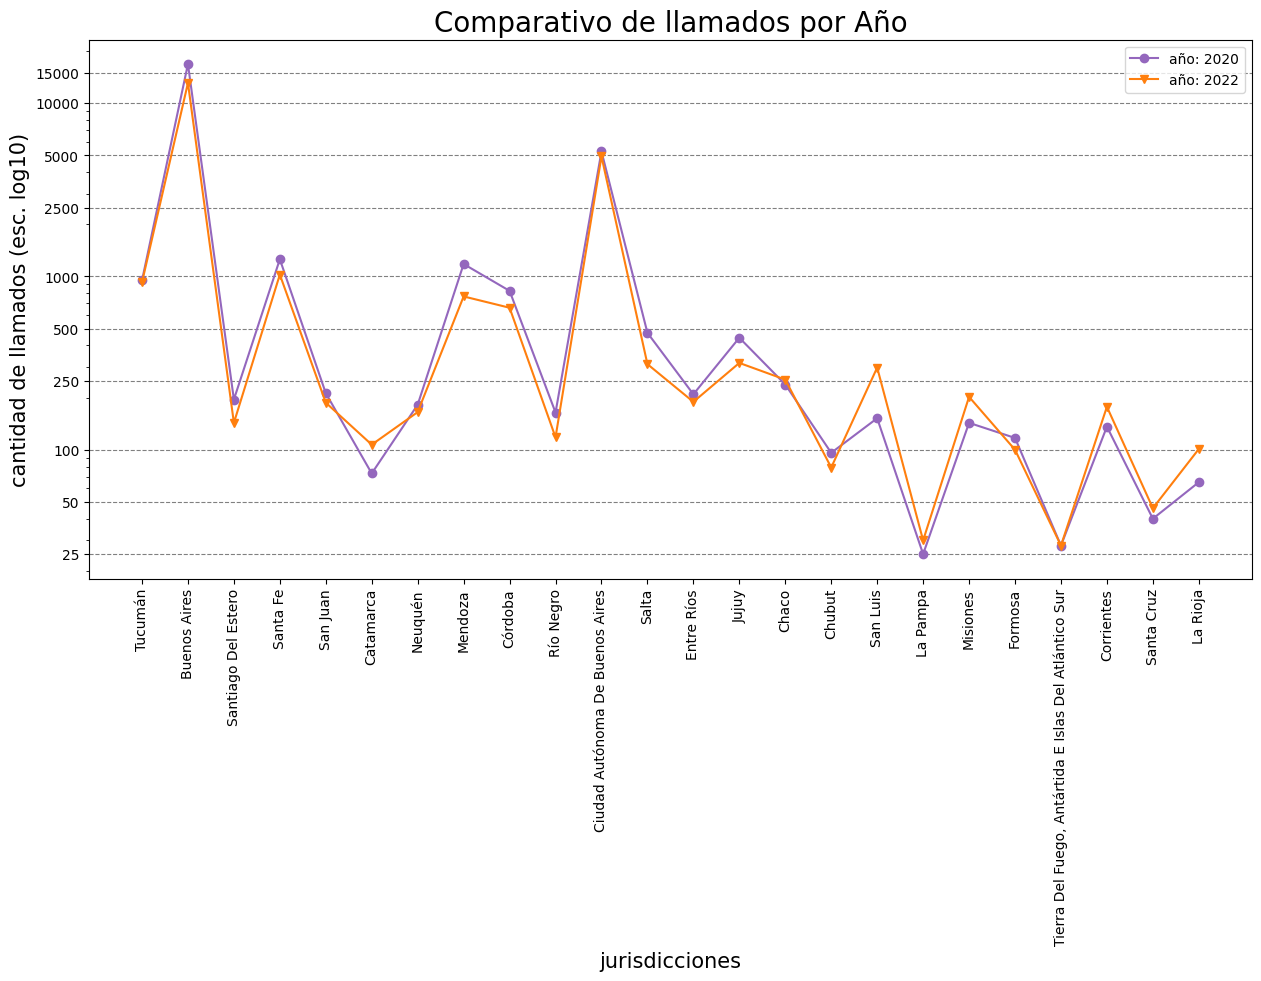

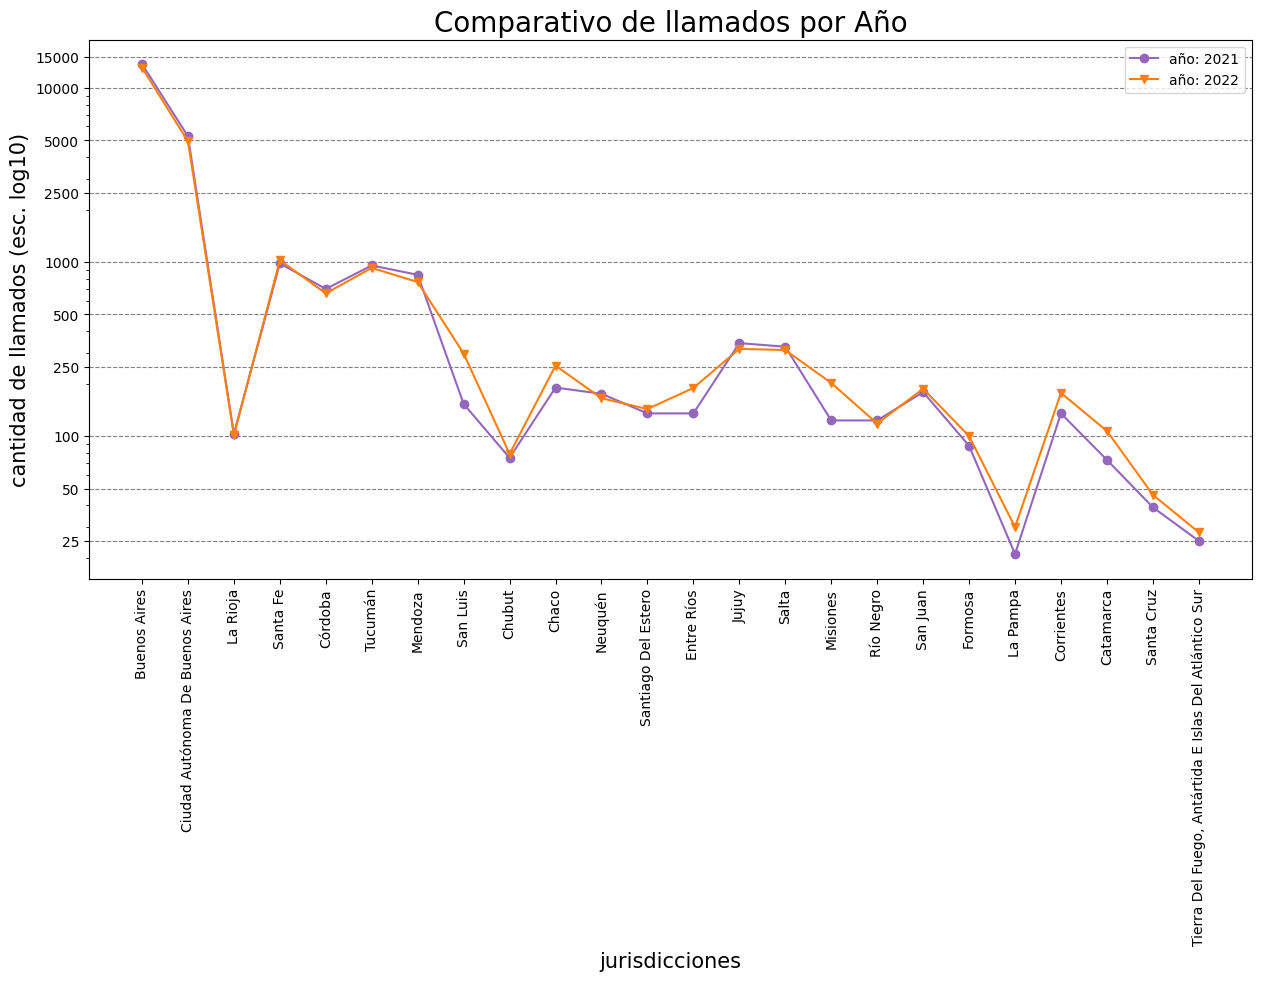

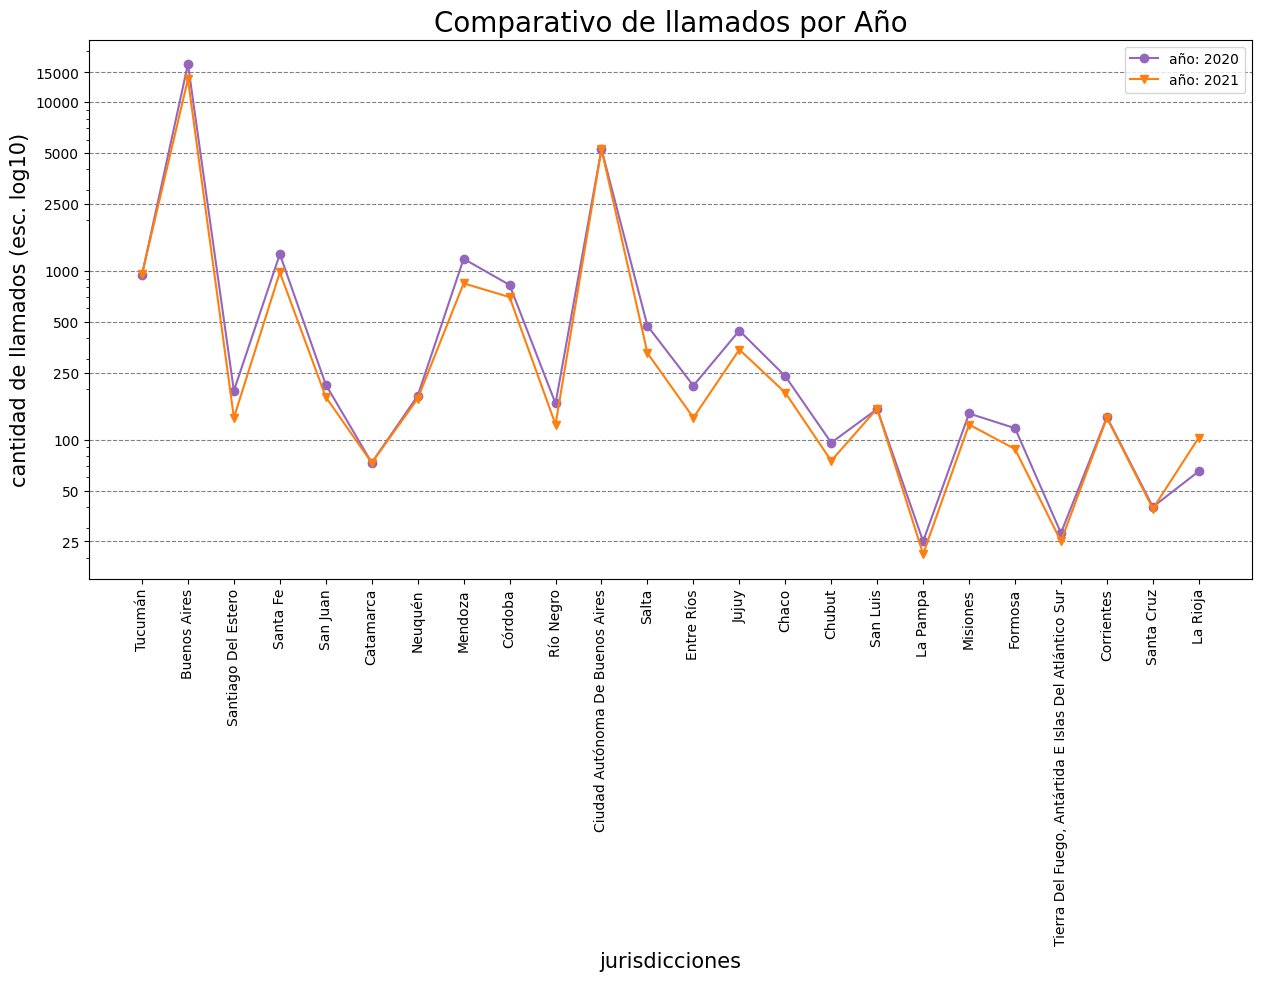

In [ ]:
listaEstadisticaAnual = crearObjetosEstadisticasAnual("datos_filtrados.csv")

infoDisponible = EstadisticasViolencia(listaEstadisticaAnual)
print(infoDisponible)
infoDisponible.minimaEdadPromedioyAnio()
infoDisponible.compararPromediosEdadesPorAnio()
infoDisponible.compararGraficamenteDosAnios(2020,2022)
infoDisponible.compararGraficamenteDosAnios(2021,2022)
infoDisponible.compararGraficamenteDosAnios(2020,2021)